In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.1.0'

In [3]:
torch.cuda.is_available()

True

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [0]:
train_dataset = datasets.FashionMNIST(root='./data', 
                            train=True, 
                            download=True,
                            transform=transform)

0it [00:00, ?it/s]

26427392it [00:01, 13309420.74it/s]                             


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 95922.60it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4104463.20it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21444.81it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
len(train_dataset)

60000

In [0]:
test_dataset = datasets.FashionMNIST(root='./data', 
                           train=False, 
                           download=True,
                           transform=transform)

In [0]:
len(test_dataset)

10000

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=32, 
                                           shuffle=True,
                                           )

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=32, 
                                          shuffle=False,
                                          )

Let's specify the list of the clothes categories 

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's look at a sample from the training dataset

In [0]:
def imshow(img):
    plt.figure(figsize=(10,8))
    plt.imshow(img.permute(1,2,0))

Get a sample from train_loader

In [0]:
image, labels = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


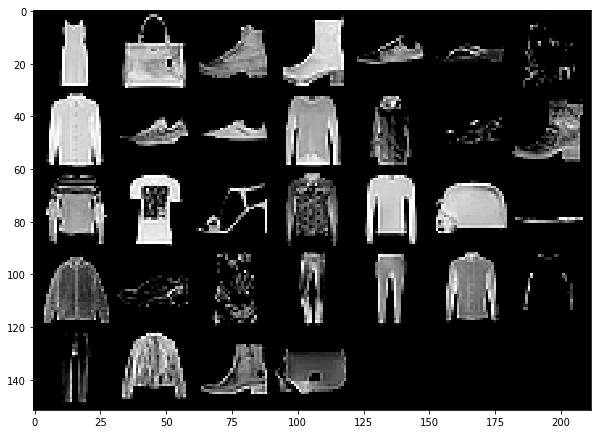

In [0]:
imshow(torchvision.utils.make_grid(image,nrow=7))

Let's look at the labels of the first 12 clothes:

In [0]:
print(list(classes[labels[j]] for j in range(12)))

['Dress', 'Bag', 'Ankle boot', 'Ankle boot', 'Sneaker', 'Sandal', 'Bag', 'Coat', 'Sneaker', 'Sneaker', 'Pullover', 'Coat']


<h2>Building the network

In [0]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        # 1 input image channel, 12 output channels, 5x5 convolution kernel, stride of 1 and padding of 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20,kernel_size=5, padding=2, stride=1)
        
        # 7*7*20 input  features, 200 output features
        self.fc1 = nn.Linear(in_features=20*7*7, out_features=200, bias=True)
        self.fc2 = nn.Linear(in_features=200, out_features=10, bias=True)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        
        # Flatten the 3d tensor to 1d tensor to feed to FC layer
        x = x.view(-1, 20*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [0]:
net = Net()

In [0]:
print(net)

Net(
  (conv1): Conv2d(1, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(12, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=980, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [0]:
epochs = 3

for epoch in range(epochs):
  for i, data in enumerate(train_loader):
      images, labels = data

      # Zero out the gradient
      optimizer.zero_grad()

      # Forward pass
      outputs = net(images)

      # Compute the loss
      loss = criterion(outputs, labels)

      # Backward pass
      loss.backward()

      # Parameter update
      optimizer.step()

      # print the loss value for every 1000 iteration
      if i % 1000 == 0:
              print ('epoch {}/{}, loss:{}'.format(epoch+1, epochs, loss.item()))

epoch 1/3, loss:2.3057658672332764
epoch 1/3, loss:0.26368021965026855
epoch 2/3, loss:0.15241943299770355
epoch 2/3, loss:0.19919003546237946
epoch 3/3, loss:0.2646927833557129
epoch 3/3, loss:0.23873263597488403


<h2>Saving and loading the model 

In [0]:
PATH = ""

# Save the parameters
torch.save(net.state_dict(), PATH)

# Load the parameters
net = Net(*args, **kwargs)

torch.load_state_dict(net.load(PATH))

# Set to testing mode
net.eval()

IsADirectoryError: ignored

<h2>the model's performance on testing data 

In [0]:
correct = 0
total = 0
with torch.no_grad() :
    for images, labels in test_loader:
        images, labels = data 
        outputs = net (images)
        # Get the index of high 
        _, predicted = outputs.max(dim=1)
        total += labels.size(0)
        #If the prediction matches the provided label
        correct += (predicted == labels).sum()
print('Test Accuracy on testing dataset is : {}%'.format(100 * correct / total))

Test Accuracy on testing dataset is : 96%


## Tensor reshaping methods


In [0]:
t = torch.rand(1,3)
t.squeeze().shape

torch.Size([3])

In [0]:
t = torch.rand(6,1)
t.reshape(3,2).shape

torch.Size([3, 2])

In [0]:
t = torch.rand(3,2)
t.unsqueeze(dim=0).shape

torch.Size([1, 3, 2])

In [0]:
t = torch.rand(3,2)
t.view(-1,6).shape

torch.Size([1, 6])

In [0]:
t = torch.rand(6,2,2)
t.flatten().shape

torch.Size([24])

In [0]:
A = torch.tensor((3), dtype=torch.float32, requires_grad=True)
A

tensor(3., requires_grad=True)

In [0]:
B = torch.tensor((2), dtype=torch.float32, requires_grad=True)
B

tensor(2., requires_grad=True)

In [0]:
C = A * B

In [0]:
C

tensor(6., grad_fn=<MulBackward0>)

In [0]:
D = torch.tensor((4), dtype=torch.float32, requires_grad=True)

In [0]:
D

tensor(4., requires_grad=True)

In [0]:
L = C + D
L

tensor(10., grad_fn=<AddBackward0>)

In [0]:
L.backward()

In [0]:
A.grad

tensor(2.)

In [0]:
B.grad

tensor(3.)

In [0]:
D.grad

tensor(1.)